In [2]:
# allows to import own functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.features.add_features import features_graph, features_pop
from src.utils.help_func import results_searchcv
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM_AGM)', os.getcwd())[0]
sys.path.append(root_project)


sns.set()

In [3]:
df = pd.read_pickle(f'{root_project}/data/processed/features_model.pickle')
df

initial_country  idx_country         R0        Tc         Tr     omega  \
0                  LBN          106   9.490802  2.214174  21.014286  0.069029   
1                  KIR           99   3.161672  6.111805  19.323523  0.012080   
2                  MOZ          129  16.439975  1.263448  20.771054  0.046275   
3                  ERI           58   2.141326  1.149404   2.461249  0.014779   
4                  VCT          174   9.327237  1.192357  11.121400  0.058201   
...                ...          ...        ...       ...        ...       ...   
159995             THA          181   9.066727  0.335565   3.042480  0.102494   
159996             DNK           50   6.780509  2.737334  18.560519  0.010965   
159997             NLD          133  10.638344  0.959925  10.212007  0.081912   
159998             FRA           65  18.104575  0.201041   3.639762  0.068196   
159999             GBR          194  10.254455  0.303348   3.110666  0.088199   

         inf_power_1   inf_power_2  \
0       2.918571e+03    114.077951   
1       9.342214e+03     15.305328   
2       8.045407e+04   2297.546954   
3       5.593643e+03    196.917492   
4       9.890000e+03    286.924893   
...              ...           ...   
159995  4.959176e+06  75443.768362   
159996  7.116357e+03     42.621101   
159997  1.638433e+05   9424.939394   
159998  4.784789e+06   5600.746919   
159999  4.749208e+06  38653.261044   

                                             gradient_inf  mort_power_1  ...  \
0       [182.0, 218.5, 306.5, 430.5, 604.0, 848.0, 119...      0.007146  ...   
1       [1133.0, 5880.5, 6536.5, 7265.0, 8072.0, 8969....      0.003708  ...   
2       [585.0, 803.5, 1401.0, 2441.5, 4255.5, 7417.0,...      0.002847  ...   
3       [140.0, 173.0, 253.5, 370.5, 542.0, 793.0, 115...      0.006883  ...   
4       [346.0, 474.0, 821.5, 1413.5, 2399.0, 3983.5, ...      0.013340  ...   
...                                                   ...           ...  ...   
159995  [472.0, 1096.0, 4002.0, 14611.0, 53325.5, 1943...      0.073128  ...   
159996  [808.0, 934.0, 1224.5, 1605.0, 2103.5, 2756.0,...      0.001566  ...   
159997  [374.0, 550.0, 1069.5, 2079.5, 4040.5, 7850.0,...      0.008075  ...   
159998  [4958.0, 16607.5, 94606.0, 537698.5, 3016190.0...      0.059901  ...   
159999  [743.0, 1848.0, 7344.5, 29187.5, 115918.0, 459...      0.069382  ...   

        limit_deaths  n_closed react_time  total_infected  total_death  \
0                 72         6         23    7.509993e+09  519150500.0   
1                872         2          2    5.277990e+09   63875908.0   
2                192         0         22    5.556171e+09  257680389.0   
3                511         9         28    4.726188e+09   69844180.0   
4                958        18         20    3.816704e+09  222148991.0   
...              ...       ...        ...             ...          ...   
159995           330         2         25    6.942852e+07    7115950.0   
159996           470        10         22    5.793351e+06      63415.0   
159997           438         2         20    1.723098e+07    1411346.0   
159998           126        17         16    6.698724e+07    4568246.0   
159999           665         3         27    6.648899e+07    5864253.0   

        total_recovered  betweenness    degree  closeness  country_pop  
0          7.521256e+09     0.001057  0.270270   0.460581    6848925.0  
1          5.290389e+09     0.000956  0.036036   0.391534     115847.0  
2          5.569051e+09     0.000059  0.054054   0.382759   29495962.0  
3          4.726333e+09     0.000007  0.049550   0.368159    3213972.0  
4          3.817110e+09     0.000035  0.040541   0.312236     110210.0  
...                 ...          ...       ...        ...          ...  
159995     6.942849e+07     0.016814  0.495495   0.532374   69428524.0  
159996     5.793301e+06     0.012772  0.414414   0.523585    5797446.0  
159997     1.723092e+07     0.035806  0.725225   0.584211   17231017.0

In [4]:
df.describe()

idx_country             R0             Tc             Tr  \
count  160000.000000  160000.000000  160000.000000  160000.000000   
mean      105.563144      12.051084       1.435365      12.008596   
std        57.531200       5.785068       1.401144       5.772946   
min         0.000000       2.000170       0.091932       2.000010   
25%        58.000000       7.022246       0.577254       7.015394   
50%       101.000000      12.083407       0.996998      12.037980   
75%       156.000000      17.065179       1.710827      16.989287   
max       204.000000      21.999684      10.840755      21.999966   

               omega   inf_power_1   inf_power_2   mort_power_1  \
count  160000.000000  1.600000e+05  1.600000e+05  160000.000000   
mean        0.109529  1.148687e+06  2.727653e+04       0.029718   
std         0.099496  6.596798e+06  2.209060e+05       0.043825   
min         0.010001  6.000000e+00 -9.994571e-01       0.000502   
25%         0.038704  3.591071e+03  9.234958e+01       0.006647   
50%         0.078890  5.049850e+04  1.134386e+03       0.014643   
75%         0.148100  4.847109e+05  8.358309e+03       0.033441   
max         1.278734  9.948071e+07  1.599545e+07       0.795757   

        mort_power_2   mort_power_3   limit_deaths       n_closed  \
count  160000.000000  160000.000000  160000.000000  160000.000000   
mean        0.612448       0.076198     501.332263       9.507088   
std        29.643842       0.070224     288.928746       5.769190   
min     -2856.666667       0.004404       1.000000       0.000000   
25%         0.005389       0.027313     251.000000       4.000000   
50%         0.014799       0.054589     501.000000      10.000000   
75%         0.054902       0.101394     752.000000      15.000000   
max      4049.000000       0.934282     999.000000      19.000000   

          react_time  total_infected   total_death  total_recovered  \
count  160000.000000    1.600000e+05  1.600000e+05     1.600000e+05   
mean       17.215981    6.529301e+07  7.129344e+06     6.529431e+07   
std         8.028823    2.345225e+08  3.469952e+07     2.345524e+08   
min         1.000000    9.304000e+03  7.900000e+01     9.296000e+03   
25%        11.000000    3.170197e+06  1.668520e+05     3.170124e+06   
50%        18.000000    1.018316e+07  8.296275e+05     1.018307e+07   
75%        24.000000    4.180152e+07  3.296396e+06     4.180142e+07   
max        29.000000    7.509993e+09  1.613234e+09     7.525938e+09   

         betweenness         degree      closeness   country_pop  
count  160000.000000  160000.000000  160000.000000  1.600000e+05  
mean        0.012886       0.291193       0.471324  6.090095e+07  
std         0.026682       0.237420       0.075014  2.051052e+08  
min         0.000000       0.009009       0.296395  1.164600e+04  
25%         0.000193       0.081081       0.411874  3.170208e+06  
50%         0.002026       0.238739       0.469345  1.018318e+07  
75%         0.015386       0.396396       0.526066  4.180153e+07  
max         0.184702       0.995495       0.634286  1.392730e+09

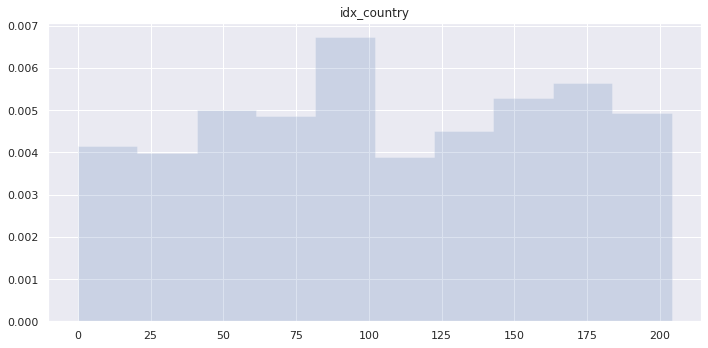

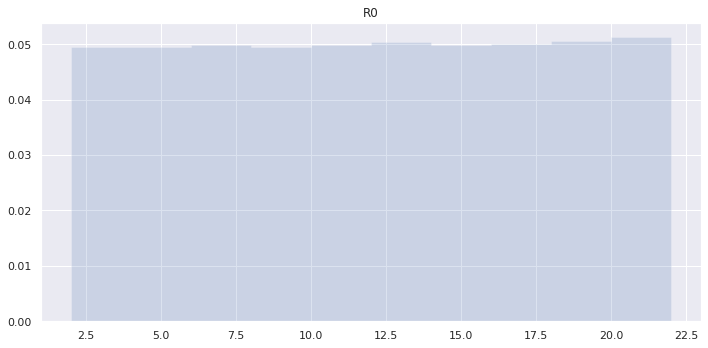

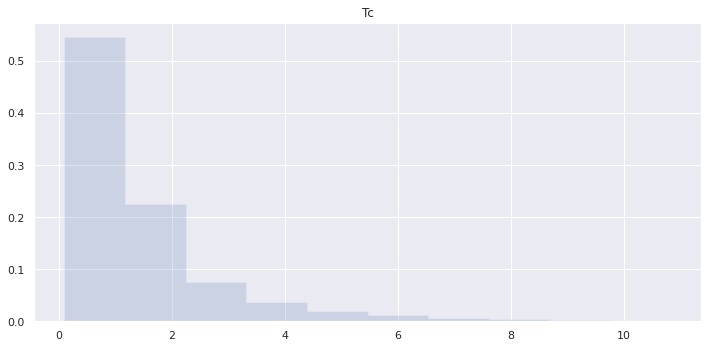

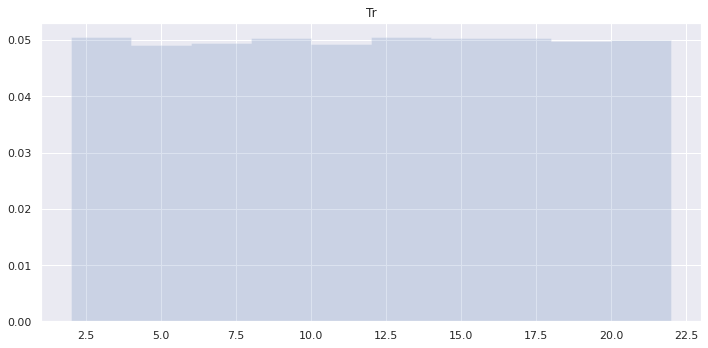

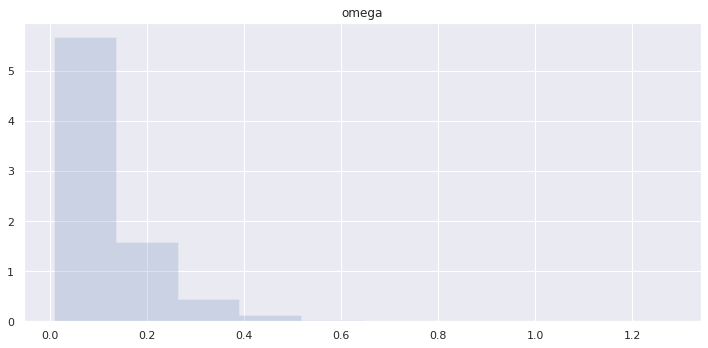

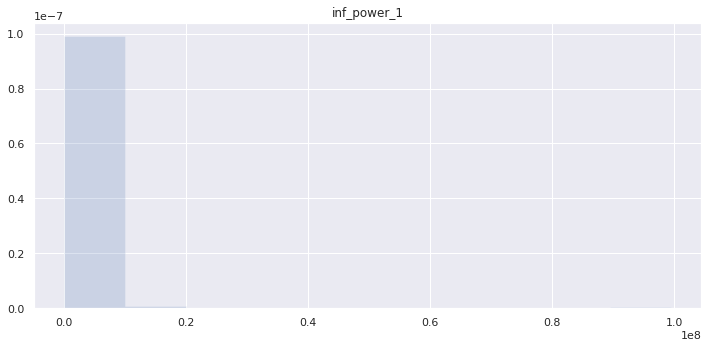

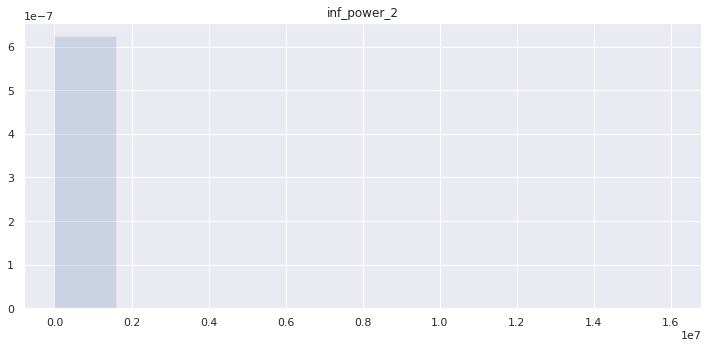

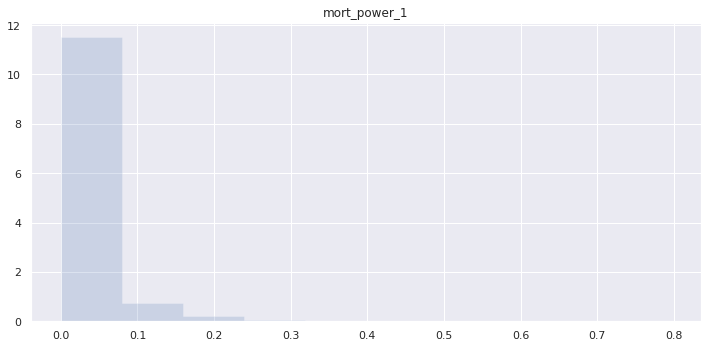

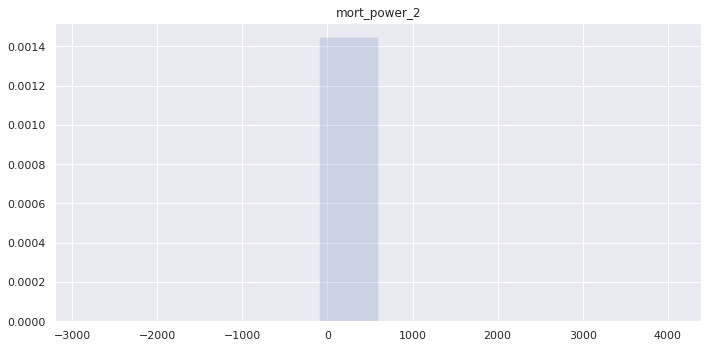

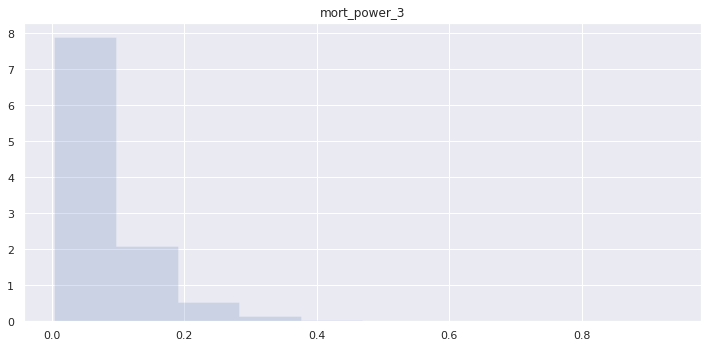

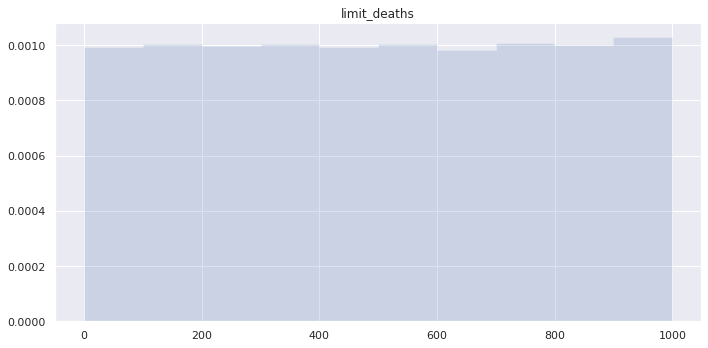

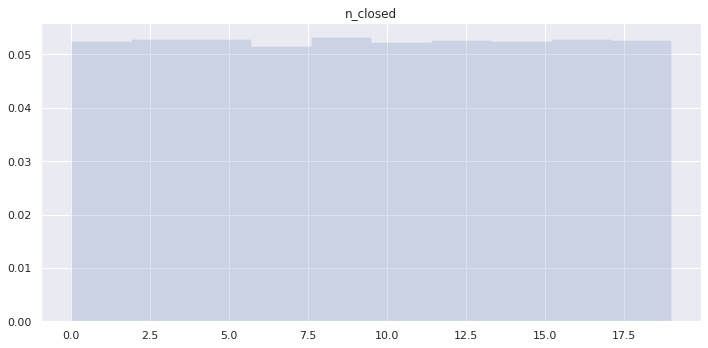

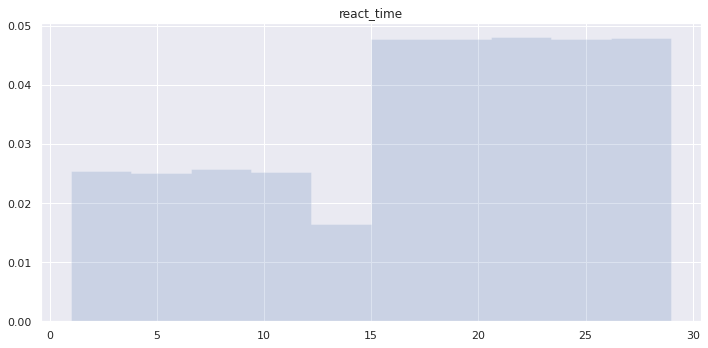

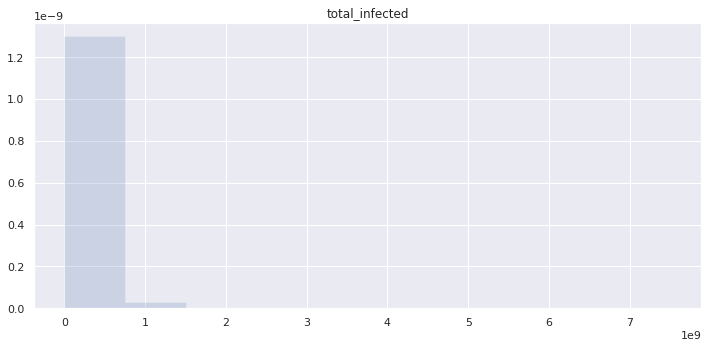

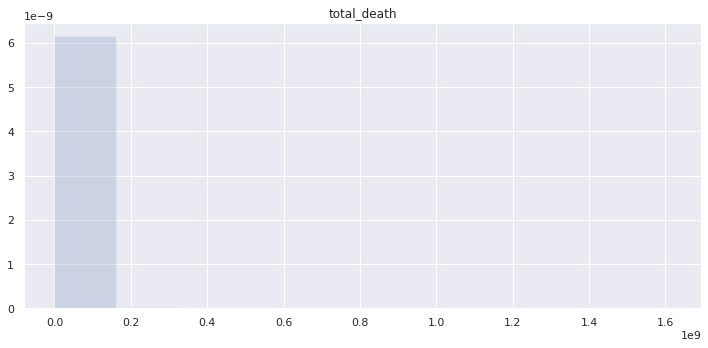

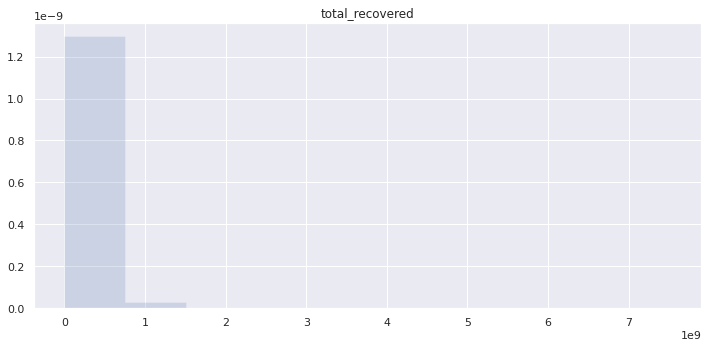

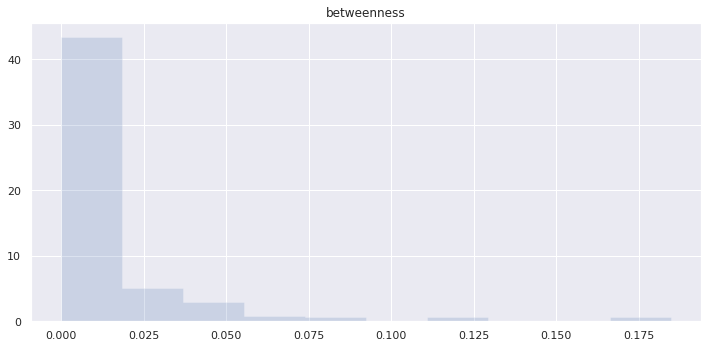

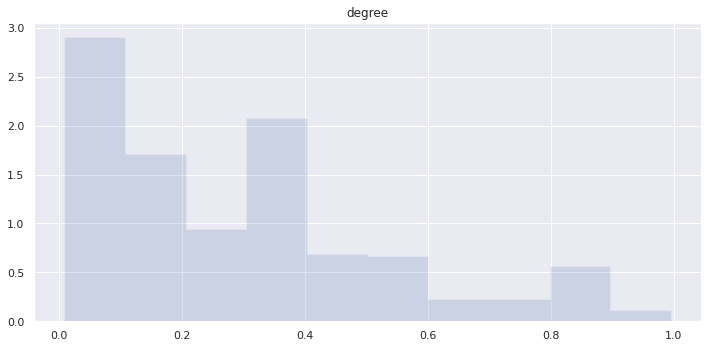

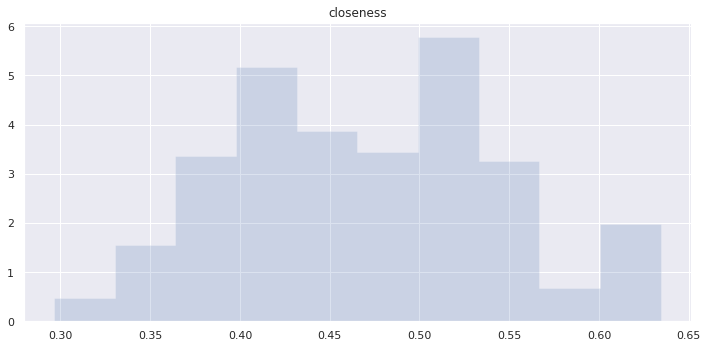

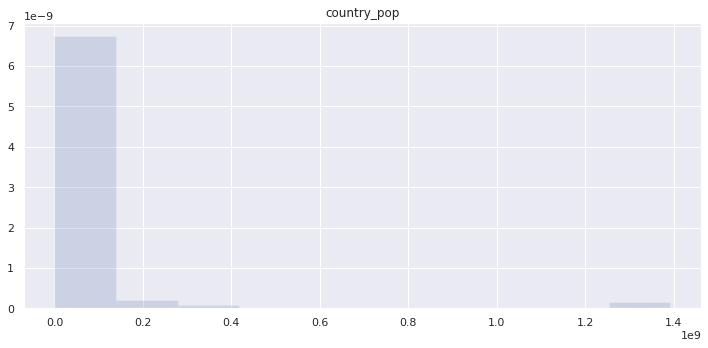

In [5]:
columns = df.describe().columns

for c in columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # df[c].plot(kind='hist', ax=ax, title=str(c))
    ax.hist(df[c], density=True, histtype='stepfilled', alpha=0.2)
    ax.set(title=str(c))
    plt.tight_layout()

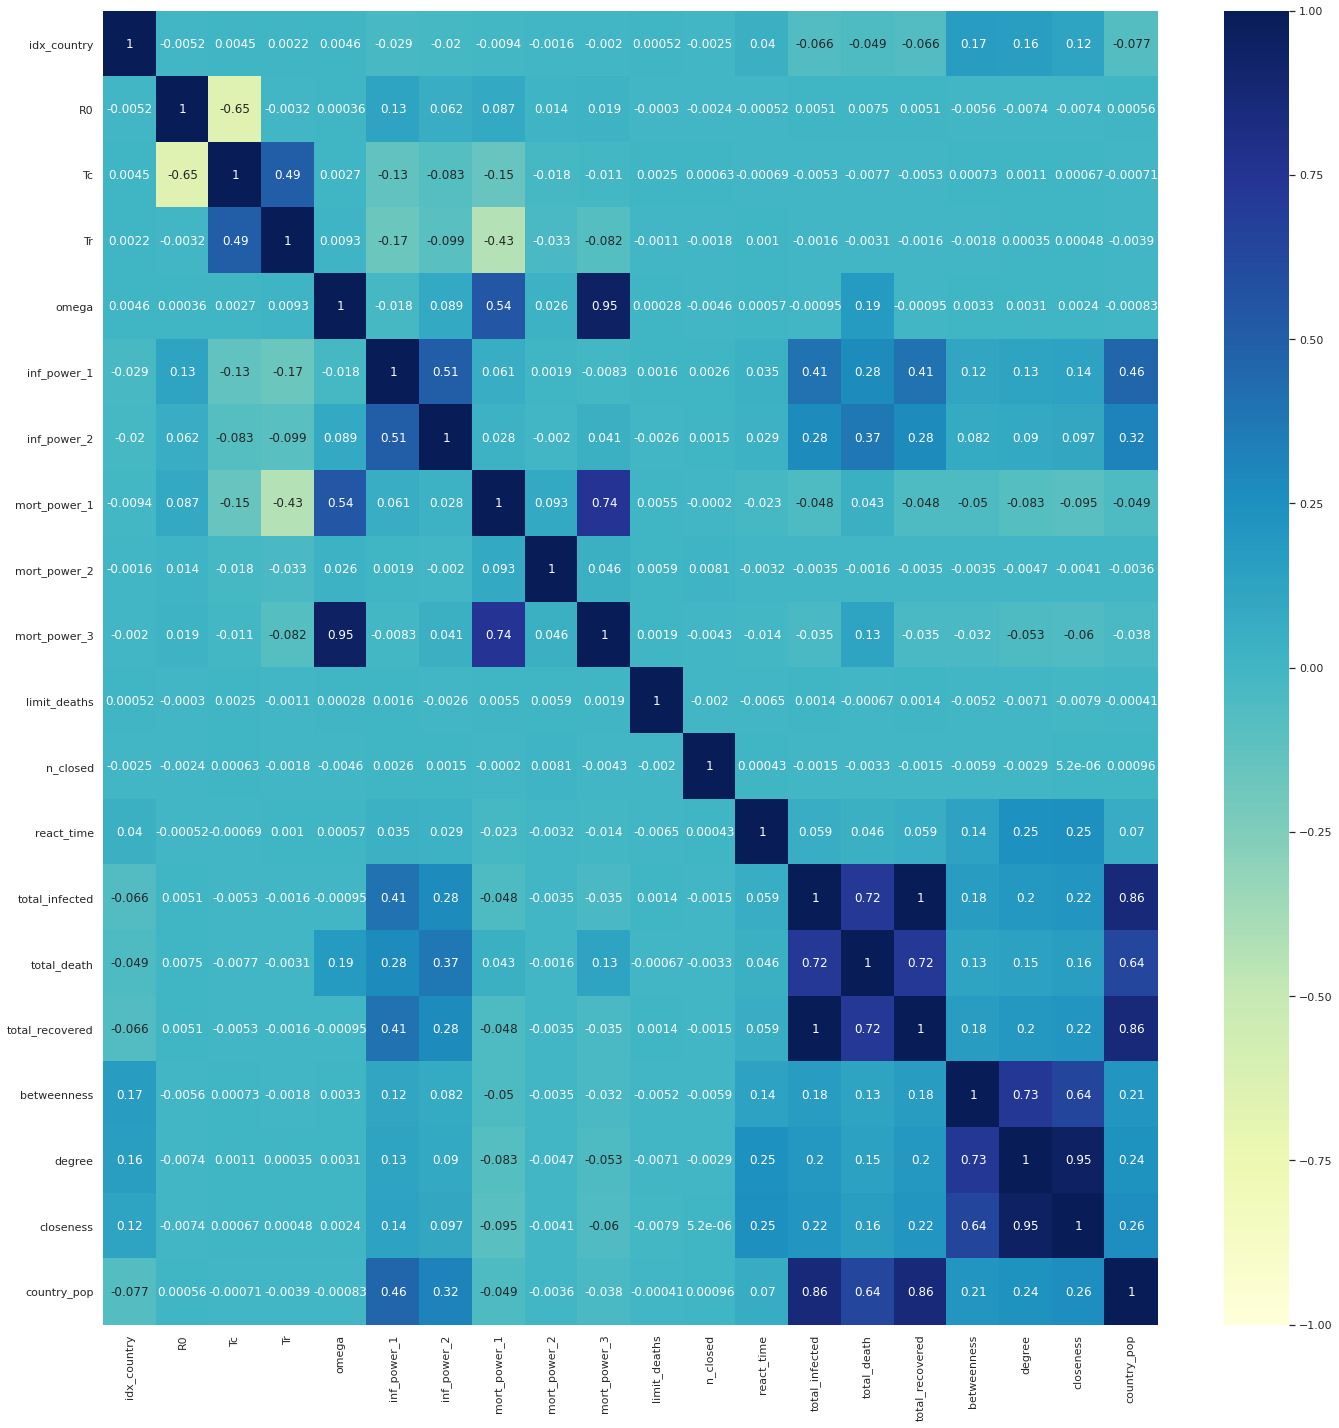

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, cmap="YlGnBu", ax=ax)
plt.tight_layout()

In [23]:
df

initial_country  idx_country         R0        Tc         Tr     omega  \
0                 LBN          106   9.490802  2.214174  21.014286  0.069029   
1                 KIR           99   3.161672  6.111805  19.323523  0.012080   
2                 MOZ          129  16.439975  1.263448  20.771054  0.046275   
3                 ERI           58   2.141326  1.149404   2.461249  0.014779   
4                 VCT          174   9.327237  1.192357  11.121400  0.058201   
...               ...          ...        ...       ...        ...       ...   
99995             CZE           49   4.732819  2.439926  11.547730  0.030647   
99996             KAZ           97  11.763182  1.447605  17.028439  0.278547   
99997             ITA           93  10.734467  0.201486   2.162848  0.029374   
99998             ARM            7  19.957722  0.655780  13.087873  0.078398   
99999             AZE           11  13.648353  0.278279   3.798044  0.093562   

       infection_power  mortality_power  limit_deaths  n_closed  react_time  \
0         2.918571e+03         0.007146            72         6          23   
1         9.342214e+03         0.003708           872         2           2   
2         8.045407e+04         0.002847           192         0          22   
3         5.593643e+03         0.006883           511         9          28   
4         9.890000e+03         0.013340           958        18          20   
...                ...              ...           ...       ...         ...   
99995     2.119500e+03         0.006201            13         2          15   
99996     6.076714e+03         0.023638            76        15          29   
99997     4.316507e+06         0.028820           434        12          21   
99998     2.108246e+05         0.019523           788         3          14   
99999     7.101601e+05         0.078868           314         0          12   

       total_infected  total_death  total_recovered  betweenness    degree  \
0        7.509918e+09  519114130.0     7.520727e+09     0.001057  0.270270   
1        5.277990e+09   63875904.0     5.290389e+09     0.000956  0.036036   
2        5.556171e+09  257680389.0     5.569051e+09     0.000059  0.054054   
3        4.726189e+09   69844201.0     4.726335e+09     0.000007  0.049550   
4        3.816622e+09  222144686.0     3.817037e+09     0.000035  0.040541   
...               ...          ...              ...          ...       ...   
99995    1.055616e+07     323427.0     1.055615e+07     0.001189  0.342342   
99996    1.827643e+07    5090723.0     1.827634e+07     0.000831  0.216216   
99997    6.043128e+07    1775100.0     6.043126e+07     0.017998  0.707207   
99998    2.951768e+06     231336.0     2.951688e+06     0.000054  0.117117   
99999    9.942327e+06     930197.0     9.942302e+06     0.000554  0.198198   

       closeness  country_pop  
0       0.460581    6848925.0  
1       0.391534     115847.0  
2       0.382759   29495962.0  
3       0.368159    3213972.0  
4       0.312236     110210.0  
...          ...          ...  
99995   0.485777   10625695.0  
99996   0.449393   18276499.0  
99997   0.572165   60431283.0  
99998   0.424474    2951776.0  
99999   0.449393    9942334.0  

[100000 rows x 18 columns]

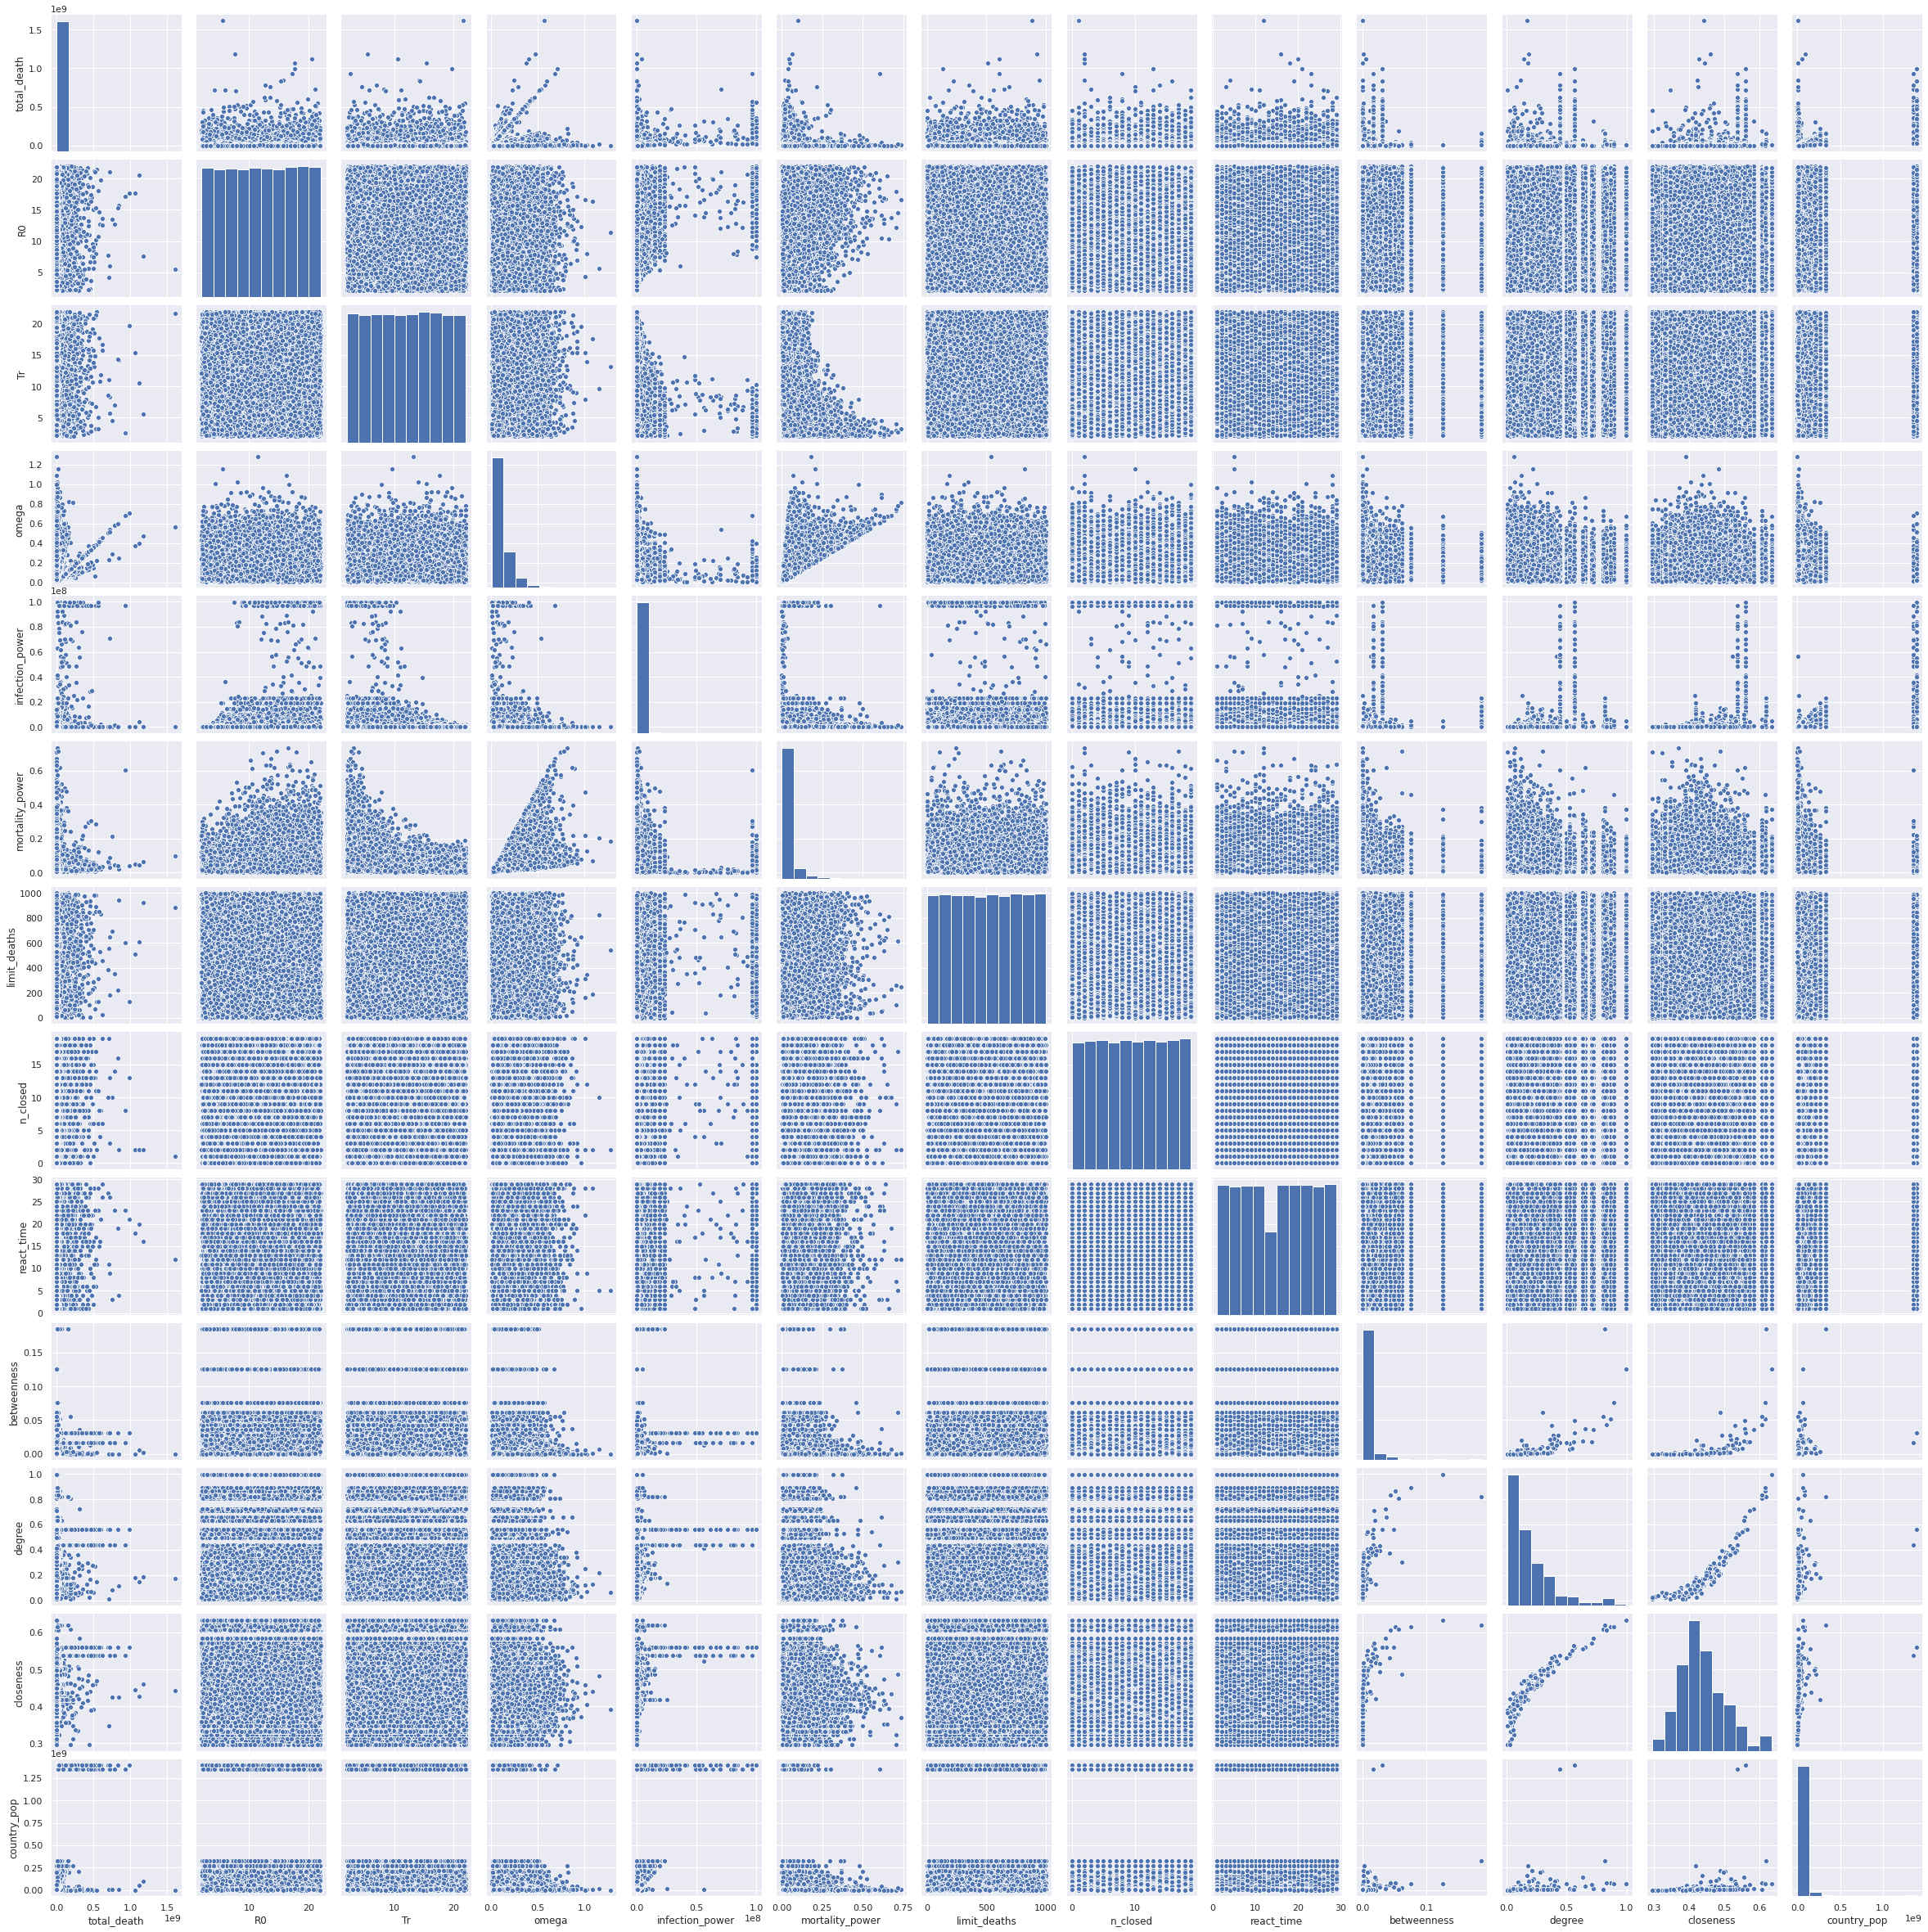

In [26]:
columns = ['total_death', 'R0', 'Tr', 'omega', 'infection_power', 'mortality_power', 'limit_deaths', 'n_closed', 'react_time',
           'betweenness', 'degree', 'closeness', 'country_pop']

sns.pairplot(df[columns])